In [0]:
# 다양한 머신러닝 알고리즘을 이용.
# 교차검증 방식으로 모델을 훈련시키고 예측 정확도를 평가해 줌

import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits

# predictive modeling 계열 (의사결정나무, 랜덤포레스트, 로지스틱 회귀, Knearest 등) <- Kmeans 어따 빼먹음
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 모델 검증 관련 (정확도)
from sklearn.metrics import accuracy_score

# preprocessing (전처리) 그룹
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder



# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False) 
# 바로 위 1줄이면 그 위위 2줄과 동일

from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix # 혼동행렬
from pandas.plotting import scatter_matrix


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# import mglearn <------------ 확인 필요. 오류남


# score류 (predictive modeling을 평가하는 지표)
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from  sklearn.metrics import f1_score # F1 스코어 (정밀도, 민감도 조화평균..)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함


## 리지, 라쏘 회귀 - 과적합을 피하기 위함

# 가중치에 계약조건을 설정해서 회귀를 구하는 알고리즘
# 이를 통해 모델의 복잡도를 다소 낮춰 적당한 편향/분산을 통해
# 적절한 회귀모델을 구함

# 일반적인 회귀분석 : 회귀계수 추정량을 구함
# 잔차의 제곱합을 최소로 하는 최소제곱법 사용

# 실제 회귀모델은 단일변수가 아닌 다중변수가 많음

# 독립변수 증가 => 변수간 강한 상관관계 => 다중공선성 문제 발생
# => 최소제곱법을 이용한 회귀계수 추정량이 커짐 => 정확도 저하

# 따라서, 중요한 변수를 선정하고, 중요하지 않은 변수는 제외
# => 변수선택(feature selection)
# 중요하지 않은 변수에 해당하는 계수 절대값을 낮춤



## 라쏘회귀(L1 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0으로 설정
# 기울기를 완전히 줄여 특정 특성이 모델에 주는 영향을 제외시킴


## 리지회귀(L2 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0에 가깝게 설정
# 기울기를 다소 줄여 특정 특성이 모델에 주는 영향을 축소시킴


## 엘라스틱넷 회귀
# 라쏘회귀와 리지회귀의 제약을 합친 모형

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [44]:
## 로지스틱 회귀/분류 분석

# 주로 분류를 하기 위한 알고리즘
# 주로 예 0 / 아니오 1 등의 이진분류에 많이 사용
# 의료, 통신, 데이터마이닝 분야의 회귀/분류를 위한 예측모델로 활용

# 머신러닝 교육자료 패키지
# 안드레아스 뮐러가 쓴 책의 그래프와 데이터셋을 
# 손쉽게 다루기 위한 패키지
# => '파이썬 라이브러리를 활용한 머신러닝'
# pip install mglearn

# 일단 이건 무시 ㅇㅇ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# 간단한 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도를 이용해서 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

logr = LogisticRegression()
clf = logr.fit(X, y)
print('R2 측정값', clf.score(X, y))


# 결정경계 시각화
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7)
plt.show()


ModuleNotFoundError: ignored

[False False  True  True False False False  True  True False False  True
  True  True False  True  True  True False False  True False False  True
  True False False  True False  True]
[0.92 1.11 0.47 1.07 1.02 0.91 1.16 1.02 0.85 0.89 0.75 0.5  0.69 0.53
 0.6 ]
[1.94 1.67 1.41 1.65 2.28 2.19 2.08 1.46 1.79 1.89 0.9  1.87 1.5  0.96
 1.21]


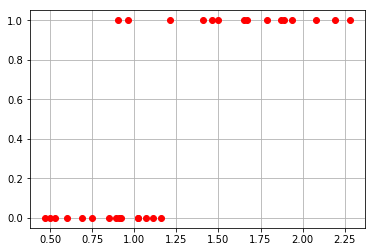

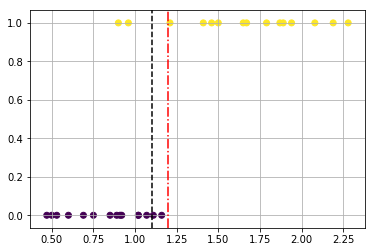

회귀계수 [[0.74825276]] [-0.43007818]


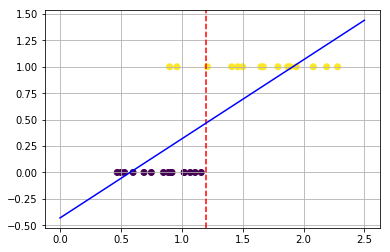

In [34]:
## 선형회귀분석 오류
# 곤충질량에 따라 암수구분을 하는 모델 생성

X = np.array([1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,
            1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,
            0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,
            0.69,1.5,0.96,0.53,1.21,0.6])
y = np.array([1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0])


# 암수 출력
print(y == 0)
print(X[y == 0])   # 암컷
print(X[y == 1])   # 수컷



# 데이터 시각화
plt.plot(X, y, 'ro')
plt.grid(True)
plt.show()

plt.scatter(X, y, c=y)
plt.axvline(x=1.1, color='k', linestyle='--')
plt.axvline(x=1.2, color='r', linestyle='-.')
plt.grid(True)
plt.show()


# 선형회귀분석으로 회귀계수 계산
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

print('회귀계수', lr.coef_, lr.intercept_)
# [0.74825276]] [-0.43007818]


# 선형회귀선 표시
x = np.linspace(0, 2.5, 50)
yy = x*lr.coef_ + lr.intercept_

plt.scatter(X, y, c=y)
plt.axvline(x=1.2, color='r', linestyle='--')
plt.plot(x.reshape(-1, 1), yy.reshape(-1, 1), 'b')
plt.grid(True)
plt.show()


0


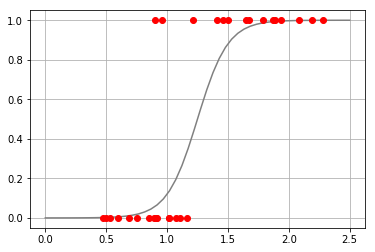

x의 결정경계값 2.5


In [35]:
# 선형방정식은 이항분포를 따르는 데이터에 적용하기에는 다소 맞지 않음
# 즉, 우변 값의 범위는 '-무한대  ~  +무한대' 이지만 좌변값의 범위는 '0 ~ 1'임

# 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대  ~  +무한대'로 하려면 적절한 변환함수가 필요
# -> 로짓함수를 이용해서 변환함

def logistic(x, w):
  yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
  return yy

# 로짓함수를 이용해서 그래프 다시 생성
W = [8, -10] # 임의 지정
x = np.linspace(0, 2.5, 50)
yy = logistic(x, W)

plt.plot(x.reshape(-1,1), yy.reshape(-1,1), color='gray')
plt.plot(X, y, 'ro')
# 결정경계 표시
i = np.min(np.where(y > 0.5)) 
# y 중 0.5가 되는 지점 찾음

print(i)

xx = (x[i-1] + x[i] / 2) # 중앙값.
# y가 0.5일 때 x의 지점을 찾음
#plt.plot([xx, xx], [0.5, 1.5], 'b--')

plt.grid(True)
plt.show()

print('x의 결정경계값', xx) # 1.25

In [43]:
# 로지스틱 회귀로 유방암 진단 분석하기
# 위스콘신 대학 유방암 진단 데이터 32변수, 569개 데이터로 구성
# 반경, 질감, 둘레, 면적, 매끄러움, 크기, 오목함, 대칭여부, 3차원 진단

cancer = load_breast_cancer()

#print(cancer.data)
#print(cancer.target)
#print(cancer.feature_names)
#print(cancer.DESCR)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1907051100) #split비율 미지정시 7.5 : 2.5?!
lgr = LogisticRegression(solver='liblinear', # liblinear, sag, saga 등이 무난 -_-;;
                         C=0.001) # C : 규제매개변수 -_-;; 값이 커지면 규제강도 증가 / 왜 0.001 줬는지는 말 안함

# solver : sklearn 20.x 이상부터는 명시적 지정 필요
# liblinear : 이항회귀, 작은 데이터셋에 적합
# lbfgs, newton-cg : 다항회귀, L1 제약
# sag, saga : 다항회귀, L2 제약, 확률적경사하강법..
#             확률적 평균 경사 하강법 사용
# C : 규제 매개변수. 값이 커지면 규제강도 증가
# 

clf = lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)


print('정확도', accuracy_score(pred, y_test))

정확도 0.9370629370629371


In [0]:
#